In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_excel("1645792390_cep1_dataset (1).xlsx")

## SHAPE OF DATASET

In [3]:
df.shape


(303, 14)

## PRINTING FEW COLUMNS

In [4]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## DESCRIPTION

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Analysing the target variable

In [7]:
df["target"].describe()


count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [8]:
df["target"].unique()


array([1, 0], dtype=int64)

## Checking Corelation between columns

In [9]:
#Correlation is a statistical relationship between two or more variables

In [10]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [11]:

#'fbs' is weakely corelated


## Eploratory Data Analytics (EDA

1    165
0    138
Name: target, dtype: int64


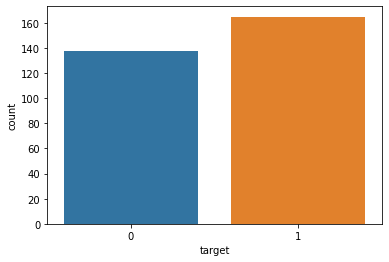

In [12]:

y = df["target"]
sns.countplot(y)
target_temp = df.target.value_counts()
print(target_temp)

In [13]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


## III. We'll analyse 'sex','cp','fbs','restecg','exang','slope','ca' and 'thal' features

## Analysing the 'Sex' feature

In [14]:
df["sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

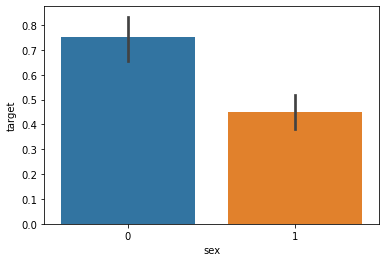

In [15]:
sns.barplot(df["sex"],y)

We notice that Female have more chances of getting heart problems

## Analysing the chest pain feature*

In [16]:
df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

We notice here cp have values between o to 3

<AxesSubplot:xlabel='cp', ylabel='target'>

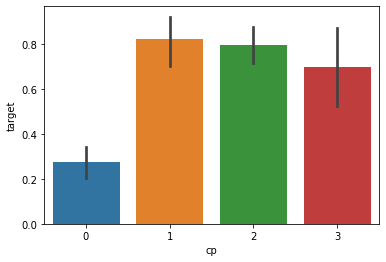

In [17]:
sns.barplot(df["cp"],y)

We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problem

## Analysing the fbs feature


In [18]:
df["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [19]:
df["fbs"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

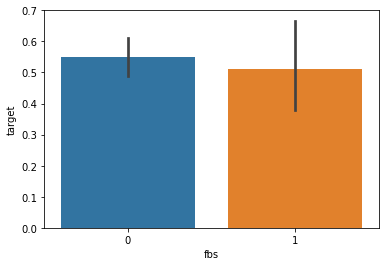

In [20]:
sns.barplot(df["fbs"],y)

## Analysing the restecg feature

In [21]:
df["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

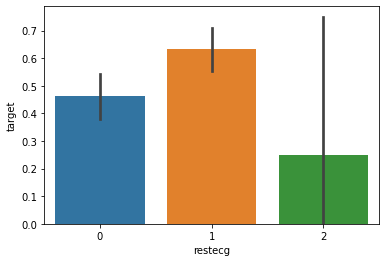

In [22]:
sns.barplot(df["restecg"],y)


We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

## Analysing the exang feature


In [23]:
df["exang"].unique()


array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

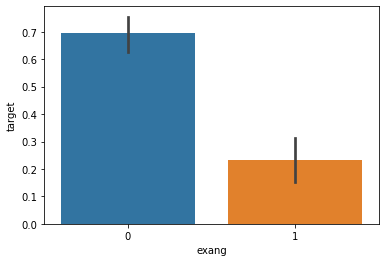

In [24]:
sns.barplot(df["exang"],y)


People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems


## Analysing slope feature

In [25]:
df["slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

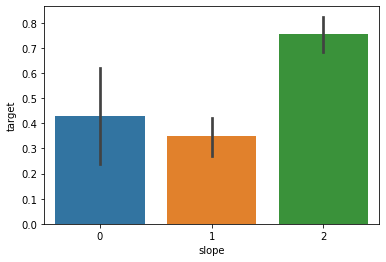

In [26]:
sns.barplot(df["slope"],y)


We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'


## Analysing the 'ca' feature

In [27]:
df["ca"].unique()


array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='target'>

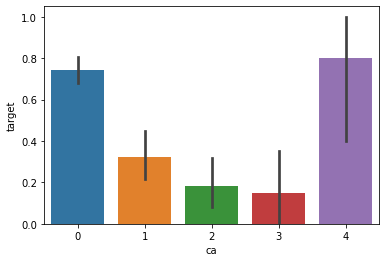

In [28]:
sns.barplot(df["ca"],y)

ca=4 has astonishingly large number of heart patients


## Analysing the 'thal' feature


In [29]:
df["thal"].unique()


array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

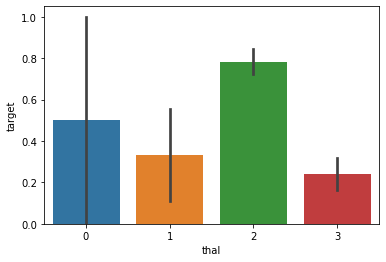

In [30]:
sns.barplot(df["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

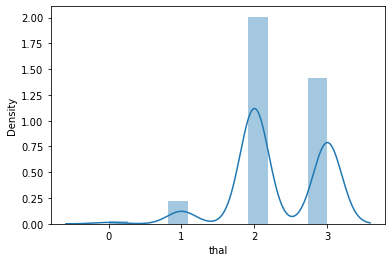

In [31]:
sns.distplot(df["thal"])
